In [93]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv("admission_data.csv")
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [96]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [97]:
corr = df.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

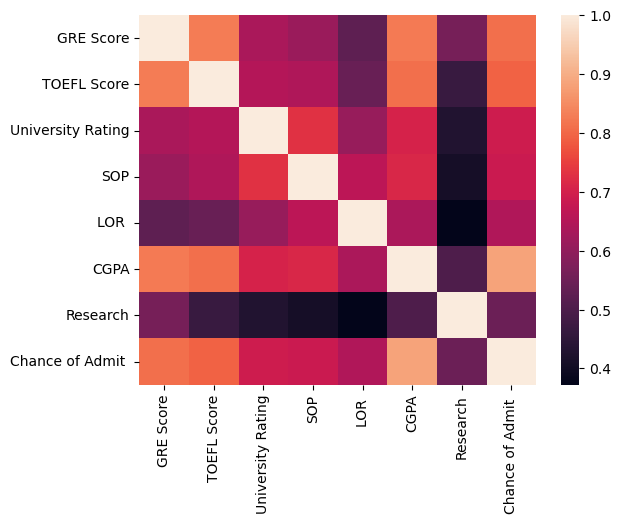

In [98]:
sns.heatmap(corr)

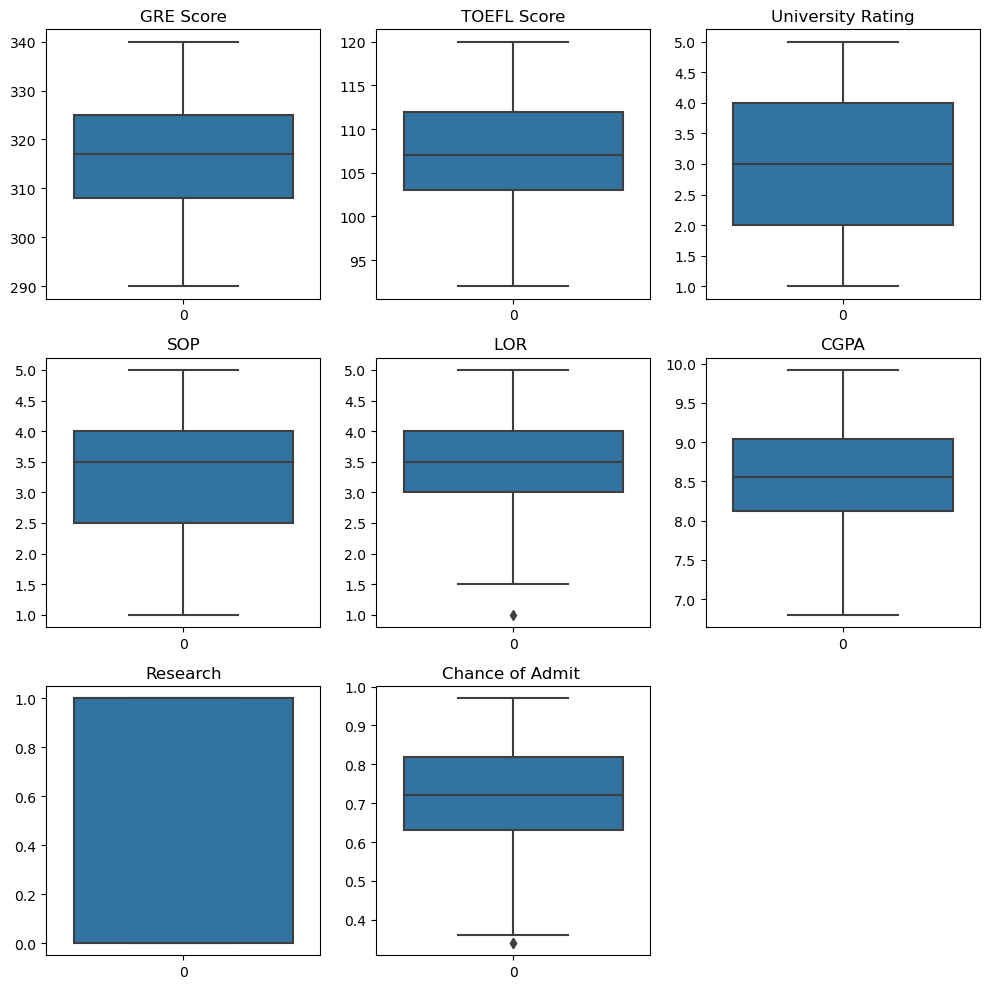

In [99]:
num_list =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']

plt.figure(figsize=(10,10))
for i in range(len(num_list)):
    plt.subplot(3,3,i+1)
    plt.title(num_list[i])
    sns.boxplot(df[num_list[i]])

plt.tight_layout()

In [100]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']

In [101]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [111]:
X_scaler_train = scaler.fit_transform(X_train)
X_scaler_test = scaler.fit_transform(X_test)

# LinearRegression

In [103]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [112]:
lr.fit(X_scaler_train,y_train)

LinearRegression()

In [113]:
y_prd1 = lr.predict(X_scaler_test)
y_prd1

array([0.64077054, 0.90582982, 0.88886058, 0.67524852, 0.56497097,
       0.83317615, 0.72205567, 0.79078645, 0.58715506, 0.54426809,
       0.73167846, 0.89823001, 0.55949299, 0.68802159, 0.7852648 ,
       0.8418717 , 0.55499723, 0.7487064 , 0.75286095, 0.87607803,
       0.86753382, 0.89883081, 0.57753869, 0.81249442, 0.57628122,
       0.80890208, 0.55486245, 0.6671629 , 0.82313155, 0.66904821,
       0.88661142, 0.71028062, 0.6800213 , 0.90604195, 0.57634023,
       0.81852839, 0.66175027, 0.74753958, 0.64828101, 0.66993436,
       0.64509224, 0.72252557, 0.51463589, 0.79456183, 0.74180707,
       0.81590068, 0.67218195, 0.62198285, 0.74568059, 0.76345254,
       0.97423795, 0.86335119, 0.94981267, 0.56644758, 0.86794622,
       0.67787897, 0.71687721, 0.55007912, 0.6442217 , 0.68697292,
       0.82462417, 0.88550393, 0.79494225, 0.95685248, 0.627845  ,
       0.5952785 , 0.68195443, 0.66716892, 0.69031496, 0.63570521,
       0.57354326, 0.5463721 , 0.64281879, 0.60129364, 0.74930

In [114]:
from sklearn.metrics import r2_score

r2_score(y_test,y_prd1)

0.7839839958998165

In [115]:
y_test

407    0.58
361    0.93
83     0.92
486    0.68
37     0.58
       ... 
447    0.84
183    0.75
436    0.58
246    0.72
203    0.97
Name: Chance of Admit , Length: 100, dtype: float64

# Decision Tree

In [116]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [117]:
dtr.fit(X_scaler_train,y_train)

DecisionTreeRegressor()

In [119]:
y_prd2 = dtr.predict(X_scaler_test)

In [122]:
from sklearn.metrics import r2_score

r2_score(y_test,y_prd2)

0.6086537815152325

# KNN

In [124]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)

In [125]:
knn.fit(X_scaler_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [127]:
y_prd3 = knn.predict(X_scaler_test)

In [128]:
from sklearn.metrics import r2_score

r2_score(y_test,y_prd3)

0.7153201511449212